In [3]:




import pandas as pd

# Create a sample dataset
data = {
    'Ticket ID': [101, 102, 103, 104, 105],
    'Date': ['2025-05-01', '2025-05-02', '2025-05-03', '2025-05-04', '2025-05-05'],
    'Customer Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Issue Description': [
        'Cannot login to my account',
        'Payment not going through',
        'App crashes when I try to open it',
        'I want a refund for my last purchase',
        'Received error while updating profile'
    ],
    'Resolution Time': [2.5, 4.0, 6.5, 3.0, 5.0]  # in hours
}

df = pd.DataFrame(data)

# Save the sample CSV
df.to_csv('customer_support_tickets.csv', index=False)
print("Sample dataset created as 'customer_support_tickets.csv'")


Sample dataset created as 'customer_support_tickets.csv'


Dataset loaded: 5 tickets



<ipython-input-4-d74539946903>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='Blues_d')


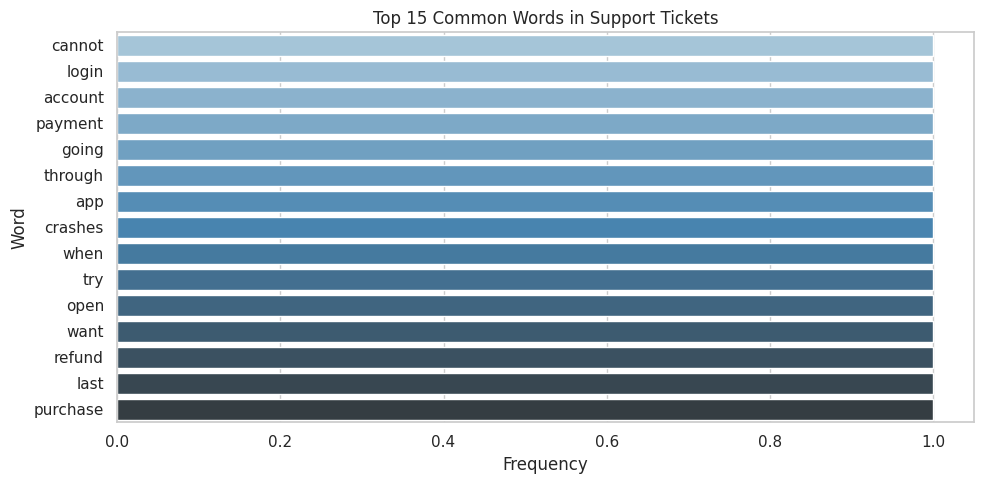

Average resolution time: 4.20 hours
Maximum resolution time: 6.50 hours

Top 3 tickets with longest resolution times:
 Ticket ID                     Issue Description  Resolution Time
       103     App crashes when I try to open it              6.5
       105 Received error while updating profile              5.0
       102             Payment not going through              4.0
Ticket Categories:
Category
Technical Error    2
Login Issue        1
Payment Issue      1
Refund Request     1


<ipython-input-4-d74539946903>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=df, order=category_counts.index, palette='pastel')


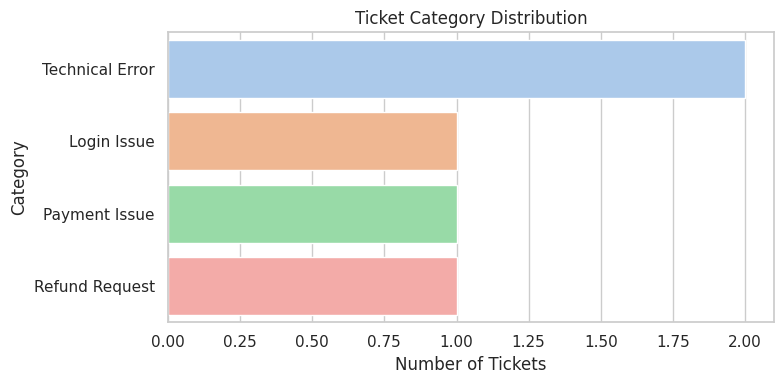

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Set plot style
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv('customer_support_tickets.csv')  # Make sure the file is in your working directory
print(f"Dataset loaded: {len(df)} tickets\n")

# Clean issue descriptions: lowercase and remove punctuation/numbers
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['Cleaned Description'] = df['Issue Description'].apply(clean_text)

# Simple tokenization and stopword removal
stopwords = {'the', 'is', 'in', 'at', 'of', 'a', 'and', 'to', 'for', 'it', 'on', 'with', 'not', 'this', 'that', 'i', 'my', 'was', 'are', 'from', 'be'}
df['Tokens'] = df['Cleaned Description'].apply(lambda x: [w for w in x.split() if w not in stopwords])

# Count word frequencies
all_words = [word for tokens in df['Tokens'] for word in tokens]
common_words = Counter(all_words).most_common(15)

# Create DataFrame for visualization
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Plot most common words
plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='Blues_d')
plt.title('Top 15 Common Words in Support Tickets')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

# Resolution time analysis (if available)
if 'Resolution Time' in df.columns:
    df['Resolution Time'] = pd.to_numeric(df['Resolution Time'], errors='coerce')
    avg_time = df['Resolution Time'].mean()
    max_time = df['Resolution Time'].max()
    print(f"Average resolution time: {avg_time:.2f} hours")
    print(f"Maximum resolution time: {max_time:.2f} hours\n")
    print("Top 3 tickets with longest resolution times:")
    print(df[['Ticket ID', 'Issue Description', 'Resolution Time']].sort_values(by='Resolution Time', ascending=False).head(3).to_string(index=False))
else:
    print("Resolution Time column not found.\n")

# Simple issue categorization
def categorize_issue(desc):
    desc = desc.lower()
    if 'login' in desc:
        return 'Login Issue'
    elif 'payment' in desc or 'billing' in desc:
        return 'Payment Issue'
    elif 'error' in desc or 'bug' in desc or 'crash' in desc:
        return 'Technical Error'
    elif 'refund' in desc or 'duplicate' in desc:
        return 'Refund Request'
    else:
        return 'Other'

df['Category'] = df['Issue Description'].apply(categorize_issue)

# Show category counts
category_counts = df['Category'].value_counts()
print("Ticket Categories:")
print(category_counts.to_string())

# Plot category distribution
plt.figure(figsize=(8, 4))
sns.countplot(y='Category', data=df, order=category_counts.index, palette='pastel')
plt.title('Ticket Category Distribution')
plt.xlabel('Number of Tickets')
plt.ylabel('Category')
plt.tight_layout()
plt.show()
